#1. Upload Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Load the dataset
data = pd.read_csv("Final_supermartdata.csv")  # Replace with your file name


Saving Final_supermart_with_holidays.csv to Final_supermart_with_holidays (3).csv


#2. Dataset Overview

In [ ]:
# Display the first few rows
data.head()

# Check data types and missing values
data.info()

# Summary statistics for numeric columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Date           9994 non-null   object 
 2   Day            9994 non-null   object 
 3   Season         9994 non-null   object 
 4   Customer Name  9994 non-null   object 
 5   City           9994 non-null   object 
 6   Region         9994 non-null   object 
 7   State          9994 non-null   object 
 8   Category       9994 non-null   object 
 9   Sub Category   9994 non-null   object 
 10  Sales          9994 non-null   int64  
 11  Discount       9994 non-null   float64
 12  Profit         9994 non-null   float64
 13  Average Temp   9994 non-null   float64
 14  Holiday        9994 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 1.1+ MB


,Sales,Discount,Profit,Average Temp
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.229168,374.942185,28.529698
std,577.559036,0.081039,239.932835,1.262664
min,500.000000,0.100000,25.300000,22.200000
25%,1000.000000,0.200000,180.025000,28.300000
50%,1498.000000,0.200000,320.800000,28.300000
75%,1994.750000,0.300000,525.625000,28.300000
max,2500.000000,0.400000,1121.000000,33.600000


#3. Check and Handle Missing Values

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Optionally handle missing values
# data.fillna(value, inplace=True)  # Replace 'value' with your strategy (mean, median, etc.)


Order ID         0
Date             0
Day              0
Season           0
Customer Name    0
City             0
Region           0
State            0
Category         0
Sub Category     0
Sales            0
Discount         0
Profit           0
Average Temp     0
Holiday          0
dtype: int64


#4. Data Distribution Visualization

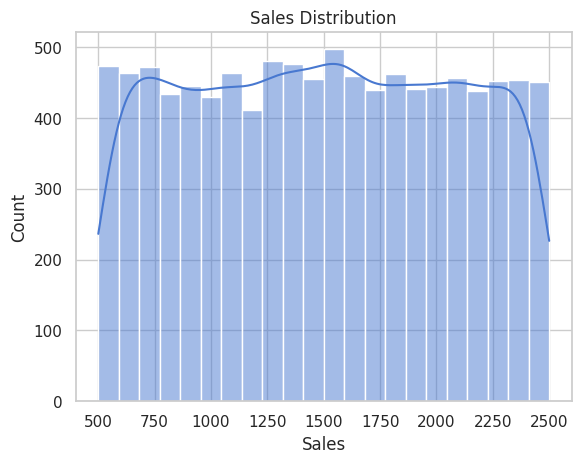

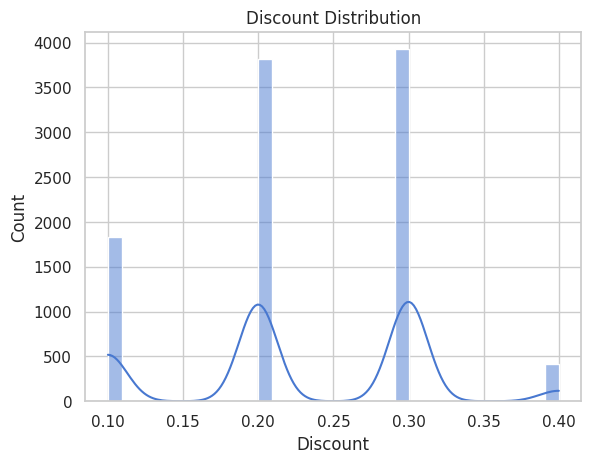

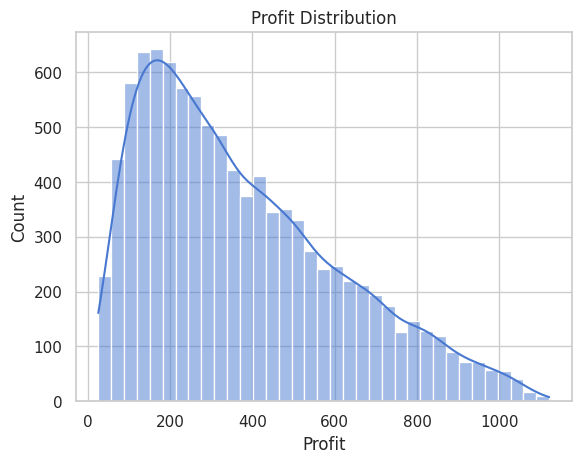

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Sales
sns.histplot(data['Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

# Distribution of Discount
sns.histplot(data['Discount'], kde=True)
plt.title('Discount Distribution')
plt.show()

# Distribution of Profit
sns.histplot(data['Profit'], kde=True)
plt.title('Profit Distribution')
plt.show()


#5. Correlation Analysis

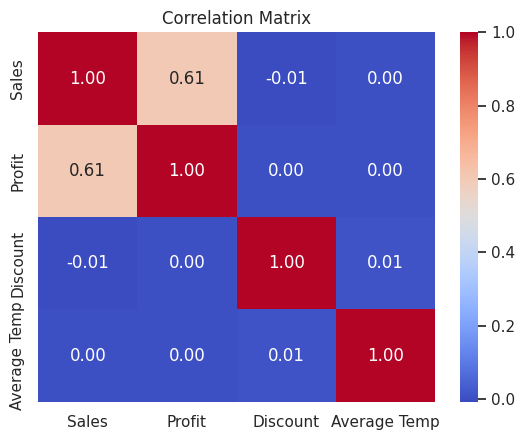

In [ ]:
# Compute correlation matrix
corr = data[['Sales', 'Profit', 'Discount','Average Temp']].corr()

# Heatmap of correlation matrix
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


#6. Temporal and Seasonal Analysis

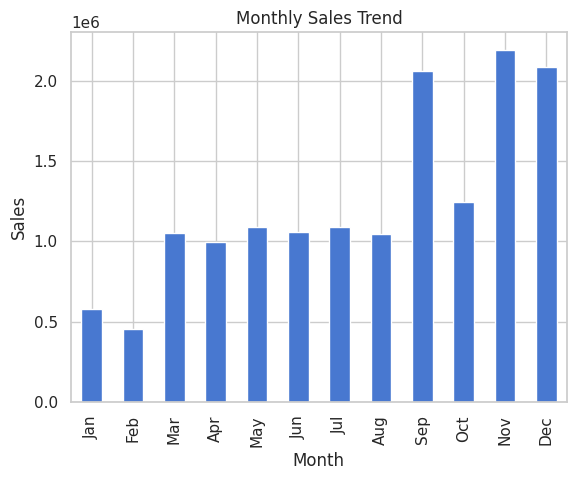

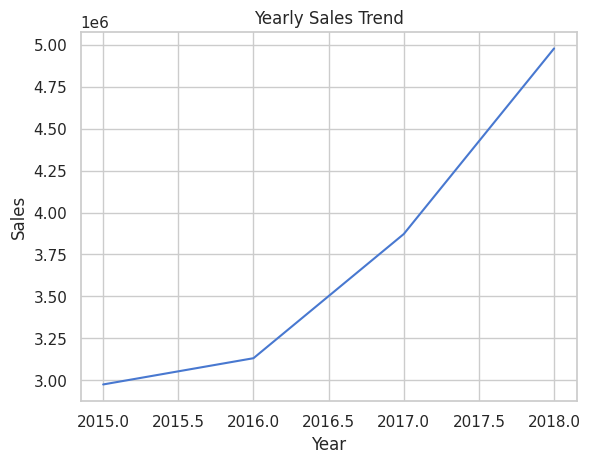

In [ ]:
# Convert 'Date' to datetime with format accommodating month abbreviations
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%Y')

# Extract time-based features
data['Year'] = data['Date'].dt.year
# Extract month abbreviations
data['Month'] = data['Date'].dt.strftime('%b')  # Extract month abbreviation
data['Day of Week'] = data['Date'].dt.day_name()

# Monthly Sales Trend
monthly_sales = data.groupby('Month')['Sales'].sum()

# Reorder the months in the desired order (Jan, Feb, Mar, ...)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales = monthly_sales.reindex(month_order)

monthly_sales.plot(kind='bar')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()

# Sales by Year
yearly_sales = data.groupby('Year')['Sales'].sum()
yearly_sales.plot(kind='line')
plt.title('Yearly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Year')
plt.show()

#7. Categorical Data Analysis

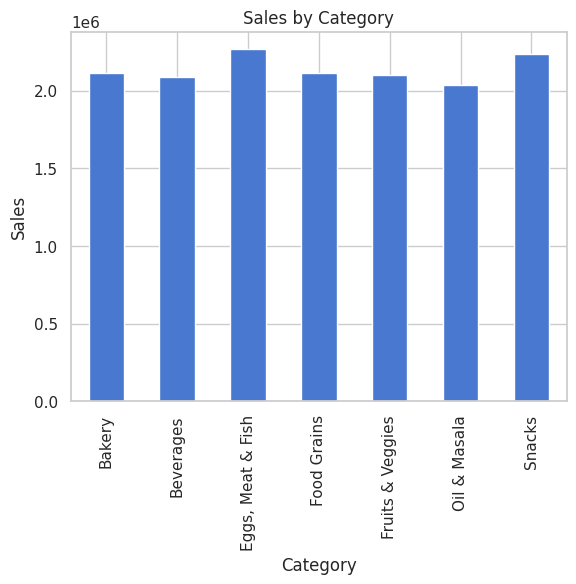

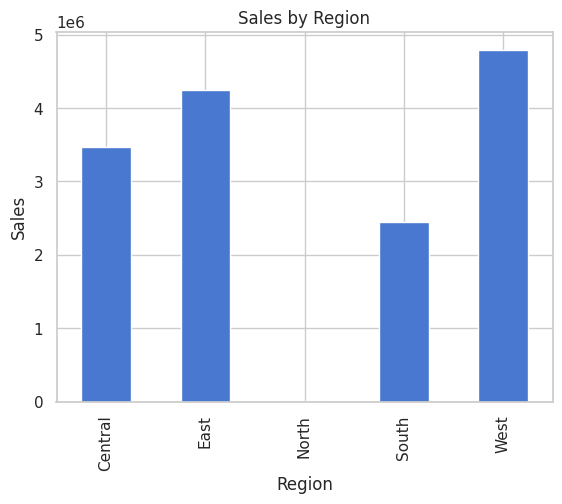

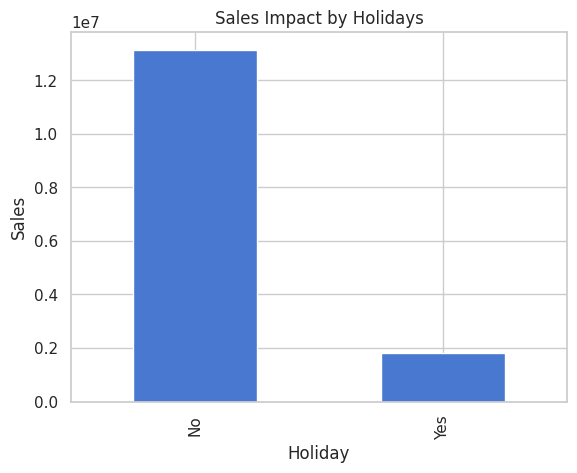

In [ ]:
# Sales by Category
category_sales = data.groupby('Category')['Sales'].sum()
category_sales.plot(kind='bar')
plt.title('Sales by Category')
plt.ylabel('Sales')
plt.xlabel('Category')
plt.show()

# Sales by Region
region_sales = data.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar')
plt.title('Sales by Region')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.show()

# Sales Impact by Holidays
holiday_sales = data.groupby('Holiday')['Sales'].sum()
holiday_sales.plot(kind='bar')
plt.title('Sales Impact by Holidays')
plt.ylabel('Sales')
plt.xlabel('Holiday')
plt.show()


#Day of Week Sales


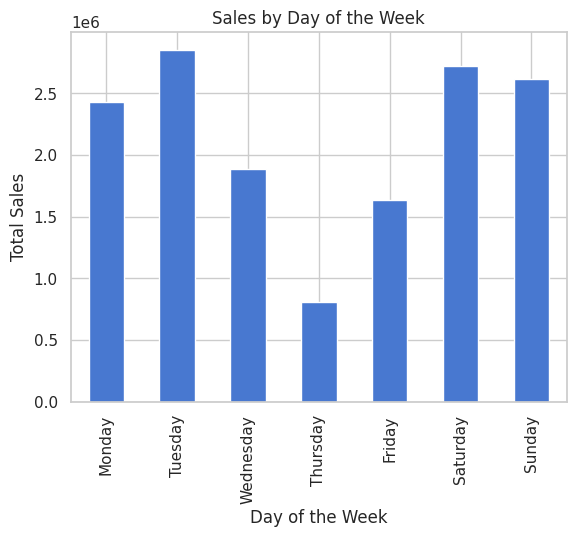

In [ ]:
# Sales by Day of the Week
day_sales = data.groupby('Day of Week')['Sales'].sum()

# Reorder the days of the week to ensure they appear correctly on the plot
day_sales = day_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot sales by day of the week
day_sales.plot(kind='bar')
plt.title('Sales by Day of the Week')
plt.ylabel('Total Sales')
plt.xlabel('Day of the Week')
plt.show()


#8. Outlier Detection

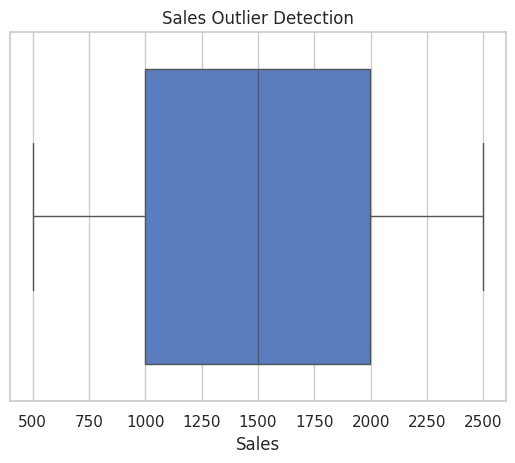

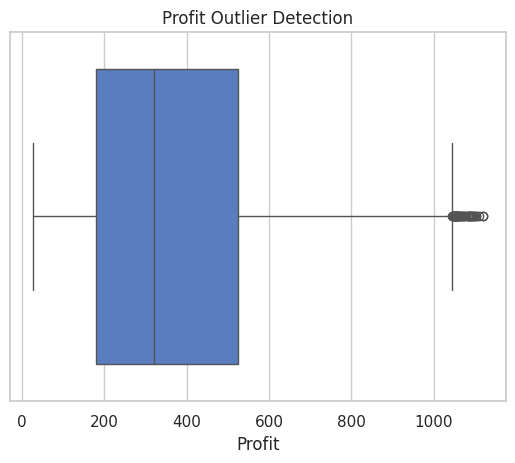

In [ ]:
# Boxplot for Sales
sns.boxplot(x=data['Sales'])
plt.title('Sales Outlier Detection')
plt.show()

# Boxplot for Profit
sns.boxplot(x=data['Profit'])
plt.title('Profit Outlier Detection')
plt.show()


#Seasonal Sales Analysis

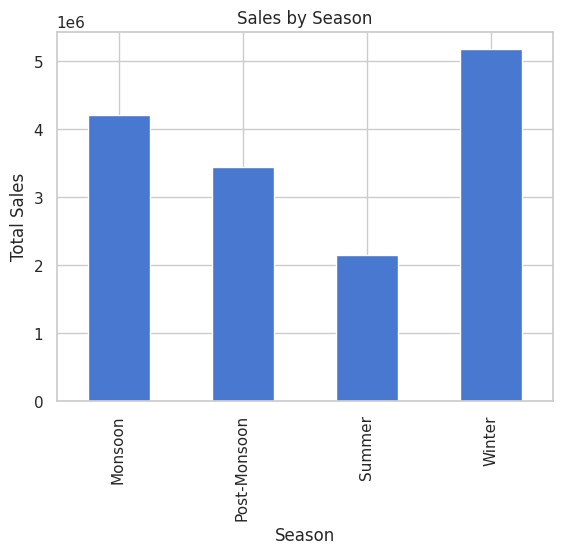

In [ ]:
# Sales by Season
season_sales = data.groupby('Season')['Sales'].sum()

# Plot sales by season
season_sales.plot(kind='bar')
plt.title('Sales by Season')
plt.ylabel('Total Sales')
plt.xlabel('Season')
plt.show()
